# Principal Component Analysis: The $n_{th}$ Article

Not exactly a machine learning algorithm, *Principal Component Analysis* (PCA) is an unsupervised algorithm that reduces the dimensionality of a dataset. It's weird, but incredibly powerful.

## Imports

In [116]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

## Data

The breast cancer that is included with Scikit-learn is ideal for this demonstration.

In [117]:
cancer = load_breast_cancer()

Do you recal how Scikit-learn structures its datasets?

In [118]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Let's take a look at the documentation.

In [119]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

We can work with the data more easily if we turn it into a pandas `DataFrame` object.

In [120]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [121]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Goodness that is a lot of features.

## PCA Visualization

It's difficult to plot high-dimensional data, so we'll try to boil this feature stew down to just two principal components (note that I did not say two *features*).

The standard scaler transforms each feature to have a mean $\mu = 0$ and standard deviation $\sigma = 1$.

In [122]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

PCA in Scikit-learn functions very similarly to the standard scaler and other machine learning models.

In [123]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
pc = pca.transform(scaled_data)

The variable `pc` contains a numpy array of two dimensionally-reduced components derived from the original thirty features.

In [124]:
print(f'Original Data Shape {scaled_data.shape}')
print(f'Reduced Data Shape {pc.shape}')

Original Data Shape (569, 30)
Reduced Data Shape (569, 2)


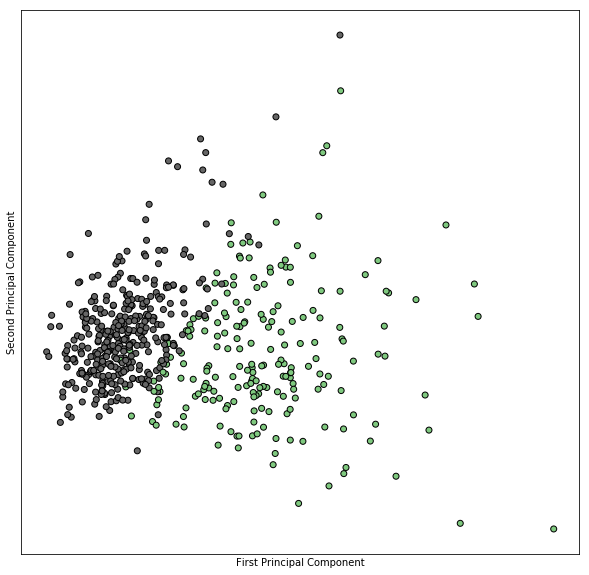

In [125]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x=pc[:,0], y=pc[:,1], c=cancer['target'], cmap='Accent', edgecolors='k')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

The difference appears incredibly stark, doesn't it?

## Interpretation

The magnificent power of dimension reduction comes at the cost of easy interpretation of just what these components are supposed to represent. These two components are not simply the two most predctive features, but rather something much more complex. The two components that we made are stored as an attribute of the PCA object.

In [126]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [127]:
component_df = pd.DataFrame(pca.components_, columns=cancer['feature_names'])
component_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


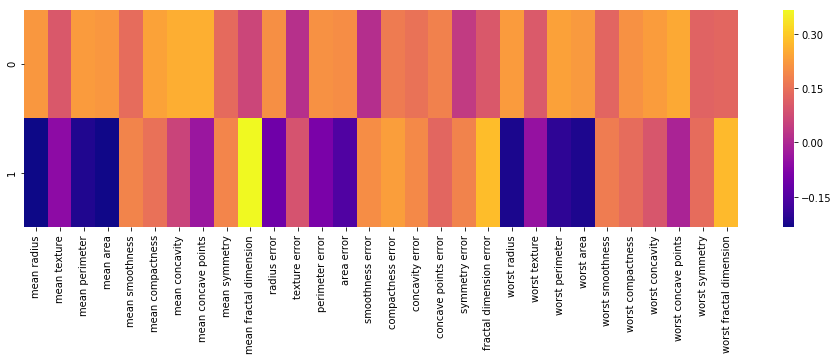

In [128]:
plt.figure(figsize=(16, 4))
sns.heatmap(component_df, cmap='plasma')

The heatmap basically shows the correlation of a feature with each principal component.

## Support Vector Classifier Revisited

So, does this help at all? Let's run a support vector classifier using the untouched data and the primary components and compare both the results and the time to run.

In [129]:
def cancer_svm(array, target):
    
    X_train, X_test, y_train, y_test = train_test_split(array, target, test_size=0.3, random_state=42)

    param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': ['auto', 1, 0.1, 0.01, 0.001, 0.0001]}
    grid = GridSearchCV(SVC(), param_grid, refit=True)

    grid.fit(X_train, y_train)
    grid_predictions = grid.predict(X_test)

    print(grid.best_estimator_)
    print(confusion_matrix(y_test, grid_predictions))
    print(classification_report(y_test, grid_predictions))

First, the unmodified data.

In [130]:
%%time
cancer_svm(cancer['data'], cancer['target'])

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[ 59   4]
 [  2 106]]
             precision    recall  f1-score   support

          0       0.97      0.94      0.95        63
          1       0.96      0.98      0.97       108

avg / total       0.96      0.96      0.96       171

CPU times: user 1.33 s, sys: 6.84 ms, total: 1.34 s
Wall time: 1.36 s


The model already performs very well, but it took a while for the grid search to finish. Now for the primary components.

In [131]:
%%time
cancer_svm(pc, cancer['target'])

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[ 59   4]
 [  2 106]]
             precision    recall  f1-score   support

          0       0.97      0.94      0.95        63
          1       0.96      0.98      0.97       108

avg / total       0.96      0.96      0.96       171

CPU times: user 578 ms, sys: 6.79 ms, total: 585 ms
Wall time: 590 ms


Using this random state, the model perform identically, but other with other states it tended to perform slightly better. Of more interest however is the significantly less time required to compute; it's about three times faster! That is thanks to the greatly reduced features, naturally.